In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from imblearn.under_sampling import NearMiss
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf

In [3]:
df=pd.read_csv("/home/sid/Documents/credit1.csv");

In [4]:
X=df.drop(['Class'],1)
y=df['Class']

In [5]:
trainX,testX,trainY,testY=train_test_split(X,y,test_size=0.2)

In [6]:
nm = NearMiss()
Xoversampled, Yoversampled = nm.fit_resample(trainX,trainY)

In [8]:
c0=0
c1=0
for i in trainY:
    if(i==0):
        c0+=1
    else:
        c1+=1

In [9]:
c0

227450

In [10]:
c1

395

In [11]:
c0=0
c1=0
for i in Yoversampled:
    if(i==0):
        c0+=1
    else:
        c1+=1

In [12]:
c0

395

In [13]:
c1

395

In [7]:
from sklearn.naive_bayes import GaussianNB

In [8]:
model=GaussianNB()

In [9]:
model.fit(trainX,trainY)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
result_nb1=model.predict(testX)

In [11]:
confusion_matrix(result_nb1,testY)

array([[56515,    26],
       [  373,    48]])

In [12]:
accuracy_score(result_nb1,testY)

0.9929953302201467

In [13]:
roc_auc_score(result_nb1,testY)

0.5567772042409601

In [14]:
f1_score(testY,result_nb1,average='weighted')

0.9954397880738651

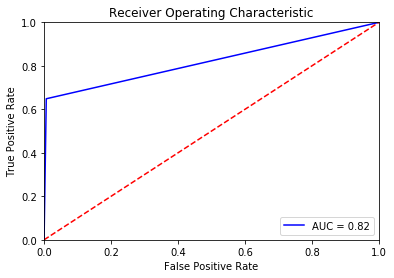

In [15]:
import sklearn.metrics as metrics
preds = result_nb1
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
model2=GaussianNB()

In [17]:
model2.fit(Xoversampled,Yoversampled)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
result_nb2=model2.predict(testX)

In [19]:
accuracy_score(result_nb2,testY)

0.8167199185421861

In [20]:
confusion_matrix(result_nb2,testY)

array([[46466,    18],
       [10422,    56]])

In [21]:
roc_auc_score(result_nb2,testY)

0.5024786506922467

In [22]:
f1_score(testY,result_nb2,average='weighted')

0.8978514137202666

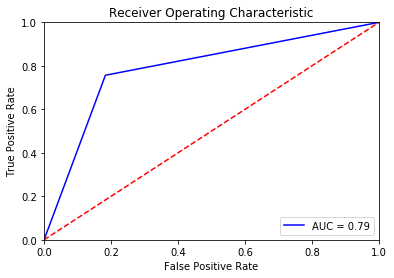

In [23]:
import sklearn.metrics as metrics
preds = result_nb2
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree1=DecisionTreeClassifier()

In [26]:
dtree1.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
result_dt1=dtree1.predict(testX)

In [28]:
print(accuracy_score(result_dt1,testY))

0.9992451107756047


In [29]:
confusion_matrix(result_dt1,testY)

array([[56862,    17],
       [   26,    57]])

In [30]:
f1_score(testY,result_dt1,average='weighted')

0.9992667178686093

In [31]:
roc_auc_score(result_dt1,testY)

0.8432240539365219

In [32]:
dtree2=DecisionTreeClassifier()

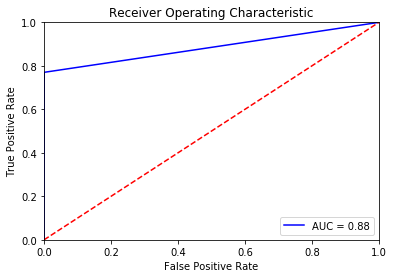

In [33]:
import sklearn.metrics as metrics
preds = result_dt1
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
dtree2.fit(Xoversampled,Yoversampled)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
result_dt2=dtree2.predict(testX)

In [36]:
confusion_matrix(result_dt2,testY)

array([[26634,     2],
       [30254,    72]])

In [37]:
print(accuracy_score(result_dt2,testY))

0.4688388750395


In [38]:
roc_auc_score(result_dt2,testY)

0.5011495570034141

In [39]:
f1_score(testY, result_dt2, average='weighted')

0.6369344487707215

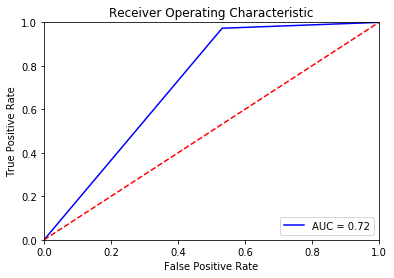

In [40]:
import sklearn.metrics as metrics
preds = result_dt2
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc1=RandomForestClassifier()

In [43]:
rfc1.fit(trainX,trainY)

/home/sid/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
result_rf1=rfc1.predict(testX)

In [45]:
print(accuracy_score(result_rf1,testY))

0.9995084442259752


In [46]:
f1_score(testY, result_rf1, average='weighted')

0.9994799086148387

In [47]:
roc_auc_score(result_rf1,testY)

0.9734732623141018

In [48]:
confusion_matrix(result_rf1,testY)

array([[56862,    24],
       [    4,    72]])

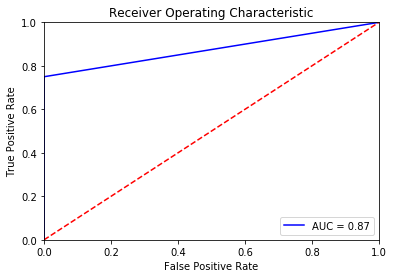

In [49]:
import sklearn.metrics as metrics
preds = result_rf1
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
rfc2=RandomForestClassifier()

In [51]:
rfc2.fit(Xoversampled,Yoversampled)

/home/sid/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
result_rf2=rfc2.predict(testX)

In [53]:
print(accuracy_score(result_rf2,testY))

0.660212071205365


In [54]:
f1_score(testY, result_rf2, average='weighted')

0.7936201084305923

In [55]:
confusion_matrix(result_rf2,testY)

array([[37517,     6],
       [19349,    90]])

In [56]:
roc_auc_score(result_rf2,testY)

0.5022349829323675

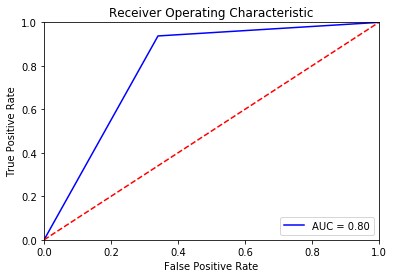

In [57]:
import sklearn.metrics as metrics
preds = result_rf2
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
from xgboost import XGBClassifier
my_model = XGBClassifier(
    colsample_bytree=0.7, subsample=0.7, max_depth=23, n_estimators=150, n_jobs=28, eval_metric=[ "error","auc"])
my_model.fit(trainX, trainY)  

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              eval_metric=['error', 'auc'], gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=23, min_child_weight=1, missing=None,
              n_estimators=150, n_jobs=28, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.7, verbosity=1)

In [59]:
result_xgb1 = my_model.predict(testX)

In [60]:
print(accuracy_score(result_xgb1,testY))

0.9995611109160493


In [61]:
roc_auc_score(result_xgb1,testY)

0.9636884004662613

In [62]:
f1_score(testY,result_xgb1,testY,average='weighted')

0.9997798127090641

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
clf = LogisticRegression(random_state=0).fit(trainX, trainY)

/home/sid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
clf2 = LogisticRegression(random_state=0).fit(Xoversampled,Yoversampled)

/home/sid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
result_lr1=clf.predict(testX)

In [67]:
result_lr2=clf2.predict(testX)

In [68]:
accuracy_score(result_lr1,testY)

0.9989817773252344

In [69]:
accuracy_score(result_lr2,testY)

0.8194059197359643

In [70]:
confusion_matrix(result_lr1,testY)

array([[56839,    31],
       [   27,    65]])

In [71]:
confusion_matrix(result_lr2,testY)

array([[46586,     7],
       [10280,    89]])

In [72]:
f1_score(result_lr1,testY,average='weighted')

0.9989925915763289

In [73]:
f1_score(result_lr2,testY,average='weighted')

0.7397316259925466

In [74]:
testY=np.array(testY)

In [75]:
roc_auc_score(testY,result_lr2)

0.8731537371481495

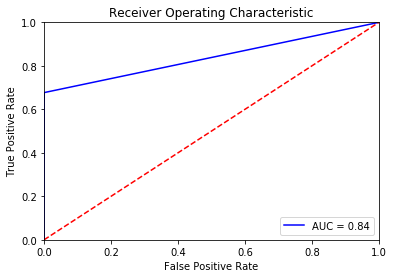

In [76]:
import sklearn.metrics as metrics
preds = result_lr1
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

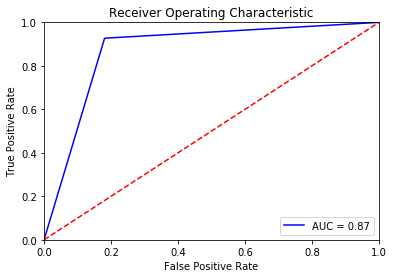

In [77]:
import sklearn.metrics as metrics
preds = result_lr2
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()